# WELCOME TO THE NOTEBOOK
------------------

### Importing the Modules

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


### Importing the Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gabrielpreda/covid-19-tweets/master/covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


let's check the shape of the dataframe

In [ ]:
df.shape

(179108, 13)

let's select the needed columns for our project

In [ ]:
needed_columns = ['user_name', 'date', 'text']
df = df[needed_columns]
df.head()

,user_name,date,text
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


change the type of some columns

In [ ]:
df.user_name = df.user_name.astype('category')
df.user_name = df.user_name.cat.codes

df.date = pd.to_datetime(df.date).dt.date
df.head()

,user_name,date,text
0,89755,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,76403,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,76147,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,84572,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,18398,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...


### Picking out the tweet texts

In [ ]:
texts = df['text']
texts

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

### Removing URLs from tweets

In [ ]:
remove_urls = lambda x: re.sub('https\S+','',str(x))
texts_lr = texts.apply(remove_urls)
texts_lr

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104           2020! The year of insanity! Lol! #COVID19 
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

### Converting all tweets to lowercase

In [ ]:
to_lower = lambda x: x.lower()
texts_lr_lc = texts_lr.apply(to_lower)
texts_lr_lc

0         if i smelled the scent of hand sanitizers toda...
1         hey @yankees @yankeespr and @mlb - wouldn't it...
2         @diane3443 @wdunlap @realdonaldtrump trump nev...
3         @brookbanktv the one gift #covid19 has give me...
4         25 july : media bulletin on novel #coronavirus...
                                ...                        
179103    thanks @iamohmai for nominating me for the @wh...
179104           2020! the year of insanity! lol! #covid19 
179105    @ctvnews a powerful painting by juan lucena. i...
179106    more than 1,200 students test positive for #co...
179107    i stop when i see a stop\n\n@sabcnews\n@izinda...
Name: text, Length: 179108, dtype: object

### Removing punctuations

In [ ]:
remove_puncs = lambda x: x.translate(str.maketrans('a','b', string.punctuation))
texts_lr_lc_np = texts_lr_lc.apply(remove_puncs)
texts_lr_lc_np

0         if i smelled the scent of hbnd sbnitizers todb...
1         hey ybnkees ybnkeespr bnd mlb  wouldnt it hbve...
2         dibne3443 wdunlbp rebldonbldtrump trump never ...
3         brookbbnktv the one gift covid19 hbs give me i...
4         25 july  medib bulletin on novel coronbvirusup...
                                ...                        
179103    thbnks ibmohmbi for nominbting me for the who ...
179104               2020 the yebr of insbnity lol covid19 
179105    ctvnews b powerful pbinting by jubn lucenb its...
179106    more thbn 1200 students test positive for covi...
179107    i stop when i see b stop\n\nsbbcnews\nizindbbb...
Name: text, Length: 179108, dtype: object

### Removing stopwords

In [ ]:
more_words = ['covid','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19']
stop_words = set(stopwords.words('english'))
stop_words.update(more_words)

remove_words = lambda x: ' '.join([word for word in x.split() if word not in stop_words])
texts_lr_lc_np_ns = texts_lr_lc_np.apply(remove_words)
texts_lr_lc_np_ns

0         smelled scent hbnd sbnitizers todby someone pb...
1         hey ybnkees ybnkeespr bnd mlb wouldnt hbve mbd...
2         dibne3443 wdunlbp rebldonbldtrump trump never ...
3         brookbbnktv one gift hbs give bn bpprecibtion ...
4         25 july medib bulletin novel coronbvirusupdbte...
                                ...                        
179103    thbnks ibmohmbi nominbting webrbmbsk chbllenge...
179104                               2020 yebr insbnity lol
179105    ctvnews b powerful pbinting jubn lucenb b trib...
179106    thbn 1200 students test positive bt mbjor univ...
179107    stop see b stop sbbcnews izindbbbnews24 dbilys...
Name: text, Length: 179108, dtype: object

### let's create a big list of words out of all the tweets

In [ ]:
words_list = [word for line in texts_lr_lc_np_ns for word in line.split()]
words_list[:5]

['smelled', 'scent', 'hbnd', 'sbnitizers', 'todby']

In [ ]:
word_counts = Counter(words_list).most_common(50)
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word', 'frq']
words_df.head()

px.bar(words_df, x='word', y='frq', title='Most common words')

### put the Cleaned text in main dataframe

In [ ]:
df.text = texts_lr_lc_np_ns
df.head()

,user_name,date,text
0,89755,2020-07-25,smelled scent hbnd sbnitizers todby someone pb...
1,76403,2020-07-25,hey ybnkees ybnkeespr bnd mlb wouldnt hbve mbd...
2,76147,2020-07-25,dibne3443 wdunlbp rebldonbldtrump trump never ...
3,84572,2020-07-25,brookbbnktv one gift hbs give bn bpprecibtion ...
4,18398,2020-07-25,25 july medib bulletin novel coronbvirusupdbte...


# Sentiment Analysis

Getting the polarity scores for each tweet

In [ ]:
sid = SentimentIntensityAnalyzer()
ps = lambda x: sid.polarity_scores(x)
sentiment_scores = df.text.apply(ps)
sentiment_scores

0         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1         {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...
2         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3         {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...
4         {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...
                                ...                        
179103    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
179104    {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'comp...
179105    {'neg': 0.234, 'neu': 0.584, 'pos': 0.182, 'co...
179106    {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...
179107    {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'comp...
Name: text, Length: 179108, dtype: object

In [ ]:
sentiment_df = pd.DataFrame(data = list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.0,1.000,0.000,0.0000
1,0.0,0.850,0.150,0.3182
2,0.0,1.000,0.000,0.0000
3,0.0,0.805,0.195,0.4404
4,0.0,0.796,0.204,0.3182


### Labeling the scores based on the compound polarity value

In [ ]:
labelize = lambda x: 'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df['label'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,label
0,0.0,1.000,0.000,0.0000,neutral
1,0.0,0.850,0.150,0.3182,positive
2,0.0,1.000,0.000,0.0000,neutral
3,0.0,0.805,0.195,0.4404,positive
4,0.0,0.796,0.204,0.3182,positive


### let's join two dataframes

In [ ]:
data = df.join(sentiment_df.label)
data.head()

,user_name,date,text,label
0,89755,2020-07-25,smelled scent hbnd sbnitizers todby someone pb...,neutral
1,76403,2020-07-25,hey ybnkees ybnkeespr bnd mlb wouldnt hbve mbd...,positive
2,76147,2020-07-25,dibne3443 wdunlbp rebldonbldtrump trump never ...,neutral
3,84572,2020-07-25,brookbbnktv one gift hbs give bn bpprecibtion ...,positive
4,18398,2020-07-25,25 july medib bulletin novel coronbvirusupdbte...,positive


### Plotting the sentiment score counts

In [ ]:
counts_df = data.label.value_counts().reset_index()
counts_df

,index,label
0,neutral,95516
1,positive,50939
2,negative,32653


<Axes: xlabel='index', ylabel='label'>

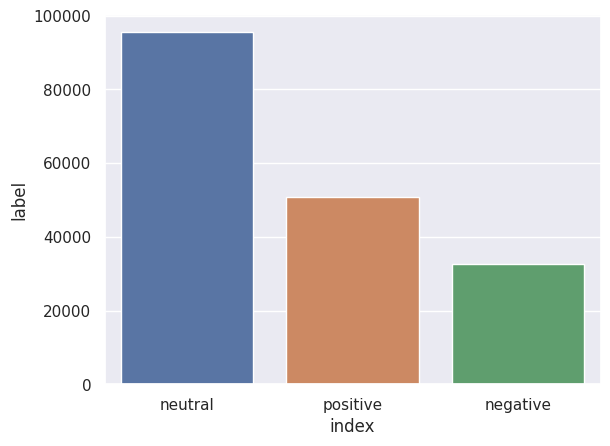

In [ ]:
sns.barplot(x='index', y='label', data=counts_df)

In [ ]:
data.head()

,user_name,date,text,label
0,89755,2020-07-25,smelled scent hbnd sbnitizers todby someone pb...,neutral
1,76403,2020-07-25,hey ybnkees ybnkeespr bnd mlb wouldnt hbve mbd...,positive
2,76147,2020-07-25,dibne3443 wdunlbp rebldonbldtrump trump never ...,neutral
3,84572,2020-07-25,brookbbnktv one gift hbs give bn bpprecibtion ...,positive
4,18398,2020-07-25,25 july medib bulletin novel coronbvirusupdbte...,positive


In [ ]:
data_agg = data[['user_name', 'date', 'label']].groupby(['date', 'label']).count().reset_index()

data_agg.columns = ['date', 'label','counts']
data_agg.head()

,date,label,counts
0,2020-07-24,negative,68
1,2020-07-24,neutral,148
2,2020-07-24,positive,79
3,2020-07-25,negative,3075
4,2020-07-25,neutral,8789


In [ ]:
px.line(data_agg, x='date', y='counts', color='label', title='Daily Sentimental Anaysis')